In [72]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
import matplotlib.dates as md
from scipy.optimize import leastsq,curve_fit
import math
import time
import datetime as dt

In [73]:
def open_data(exp_id):
    ## basic paths
    data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
    analysis_local_path='D:/Analysis/' # D:\ is local SSD in the main experiment computer
    analysis_master_path='C:/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
    experiment_file='results.hdf5'
    qdp_name='qdp.txt'

    exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
    exp_path=data_master_path+exp_date+'/'+exp_id+'/'
    analysis_path=analysis_master_path+exp_date+'/'+exp_id+'/'

    if not os.path.exists(analysis_path):
        os.makedirs(analysis_path)

    if os.path.isfile(analysis_path+qdp_name):
        print "Yay! found old qdp class. We can save time!"
        q = qdp.load_qdp(filename=analysis_path+qdp_name)
    else:
        print "Coudn't find processed qdp. Loading and saving"
        q = qdp.QDP(base_data_path=exp_path)
        q.load_data_file(experiment_file)
        q.save_qdp(filename=analysis_path+qdp_name)
    return q

def process_container(exp_id):
    q=open_data(exp_id)
    cuts=[[450],[450],[450]]
    for r in range(5):
        q.set_thresholds(cuts, roi=r)
    xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
    retention = q.apply_thresholds()
    
    e=0
    timestamp=[]
    xdata=[]
    reten={}
    err={}
    container={}
    for i in q.experiments[e]['iterations']:
        iter_timestamp=q.experiments[e]['iterations'][i]['timestamp_iteration']
        timestamp.append(iter_timestamp)
        xdata.append(np.squeeze(retention['ivar'])[i][0])
        for roi in [0,1,2,3,4]:
            if i==0:
                reten[str(roi)]=[]
                err[str(roi)]=[]
            reten[str(roi)].append(np.squeeze(retention['retention'])[i][roi])
            err[str(roi)].append(np.squeeze(retention['error'])[e][roi])

    dates=[dt.datetime.fromtimestamp(ts) for ts in timestamp]
    container['exp_id']=exp_id
    container['timestamps']=timestamp
    container['datetime']=dates
    container['xdata']=xdata
    container['retentions']=reten
    container['errors']=err
    return container

def flatten(l):
    flat_list = [item for sublist in l for item in sublist]
    return flat_list


def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-(x-x0)**2)/(sigma**2)))+offset
    return res

# Set experiment(s) to analyze


In [74]:
exp_ids=['2018_03_08_16_00_04_Open loop, free running stability check, new imaging configuration',
        '2018_03_08_18_04_26_Open loop, free running stability check, new imaging configuration',
        '2018_03_08_20_00_01_Open loop, free running stability check, new imaging configuration']
assorted={}
assorted['exp_ids']=[]
assorted['timestamps']=[]
assorted['retentions']=[[],[],[],[],[]]
assorted['errors']=[[],[],[],[],[]]
for exp_id in exp_ids:
    container=process_container(exp_id)
    assorted['exp_ids'].append(container['exp_id'])
    assorted['timestamps'].append(container['timestamps'])
    for roi in [0,1,2,3,4]:
        assorted['retentions'][roi].append(container['retentions'][str(roi)])
        assorted['errors'][roi].append(container['errors'][str(roi)])


Yay! found old qdp class. We can save time!
qdp has been imported from :C:/Analysis/2018_03_08/2018_03_08_16_00_04_Open loop, free running stability check, new imaging configuration/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :C:/Analysis/2018_03_08/2018_03_08_18_04_26_Open loop, free running stability check, new imaging configuration/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :C:/Analysis/2018_03_08/2018_03_08_20_00_01_Open loop, free running stability check, new imaging configuration/qdp.txt


<IPython.core.display.Javascript object>


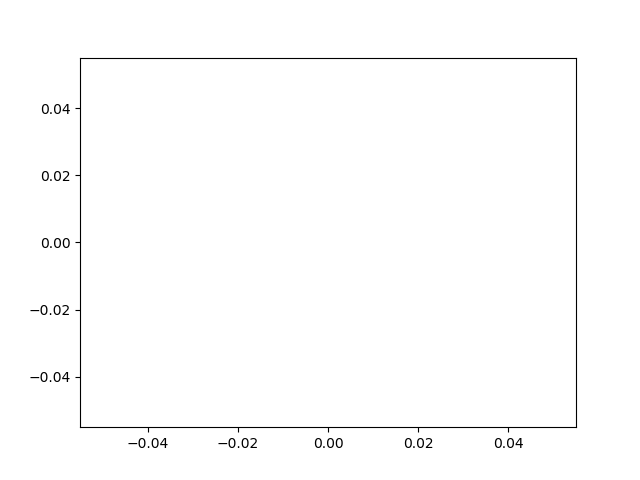

[1520546411.124, 1520546478.074, 1520546550.018, 1520546620.553, 1520546686.233, 1520546757.85, 1520546827.612, 1520546897.208, 1520546965.496, 1520547034.524, 1520547102.877, 1520547171.927, 1520547240.467, 1520547311.035, 1520547380.986, 1520547449.323, 1520547517.614, 1520547586.218, 1520547650.276, 1520547720.134, 1520547788.274, 1520547856.561, 1520547925.185, 1520547993.974, 1520548062.32, 1520548130.63, 1520548198.925, 1520548267.937, 1520548336.685, 1520548405.299, 1520548473.694, 1520548542.236, 1520548610.366, 1520548678.733, 1520548742.899, 1520548812.126, 1520548880.669, 1520548948.595, 1520549016.988, 1520549085.292, 1520549153.761, 1520549222.089, 1520549291.525, 1520549360.713, 1520549429.592, 1520549498.201, 1520549567.117, 1520549635.968, 1520549704.664, 1520549773.226, 1520549841.707, 1520549909.844, 1520549977.951, 1520550046.528, 1520550115.321, 1520550185.807, 1520550254.398, 1520550322.735, 1520550391.701, 1520550461.186, 1520550529.662, 1520550598.593, 1520550667

<ErrorbarContainer object of 3 artists>

In [9]:
roi=1
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
xdata=flatten(assorted['timestamps'])
ydata=np.array(flatten(assorted['retentions'][roi]))
err=np.array(flatten(assorted['errors'][roi]))
fig, ax = plt.subplots()
#print xdata
ax.errorbar(xdata,ydata,yerr=err,label="ROI:{}".format(roi),fmt='o',markersize=3,color=colors[roi],capsize=1)
#xfmt=md.DateFormatter('%H:%M')

In [ ]:
#assorted camera data analysis

assorted={}
assorted['exp_ids']=[]
assorted['timestamps']=[]
assorted['retentions']=[[],[],[],[],[]]
assorted['errors']=[[],[],[],[],[]]
for exp_id in exp_ids:
    container=process_container(exp_id)
    assorted['exp_ids'].append(container['exp_id'])
    assorted['timestamps'].append(container['timestamps'])
    for roi in [0,1,2,3,4]:
        assorted['retentions'][roi].append(container['retentions'][str(roi)])
        assorted['errors'][roi].append(container['errors'][str(roi)])


<IPython.core.display.Javascript object>


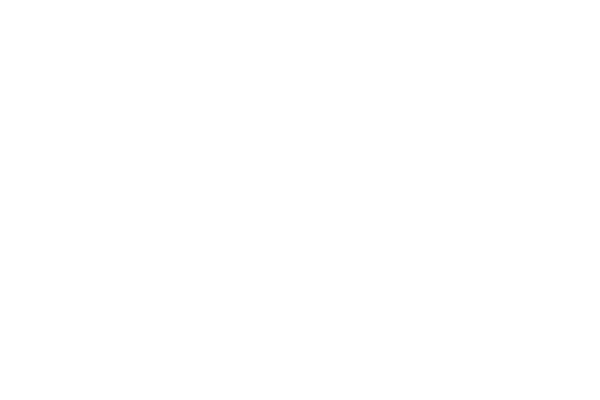

NameError: name 'retention' is not defined

In [5]:
savefig=False
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
fit_guesses=[30,0.4,2,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    data = []
    timedata=[]
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(dates,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',markersize=3,color=colors[roi],capsize=1)
    ax.xaxis.set_major_formatter(xfmt)
    datemin = dt.datetime(2018, 3, 5,0,0,0)
    datemax = dt.datetime(2018, 3, 5,4,0,0)
    ax.set_xlim(datemin, datemax)

# Analyzing experiments without atoms

In [115]:
keylist=['Red_camera_dataX',
 'Red_camera_dataY',
 'FORT_camera_dataY',
 'FORT_camera_dataX',
 'timestamp_measurements',
 'timestamp_iteration']

exp_ids=['2018_03_08_16_00_04_Open loop, free running stability check, new imaging configuration',
        '2018_03_08_18_04_26_Open loop, free running stability check, new imaging configuration',
        '2018_03_08_20_00_01_Open loop, free running stability check, new imaging configuration',
        '2018_03_08_21_56_51_Open loop, free running stability check, new imaging configuration']

data={}
for j in range(0,len(exp_ids)):
    exp_id=exp_ids[j]
    q=open_data(exp_id)
    e=0
    for i in q.experiments[e]['iterations']:
        for key in keylist:
            if i==0 and j==0:
                data[key]=[]
            try:
                data[key].append(q.experiments[e]['iterations'][i][key])
            except:
                print "error occured : exp {}, iter {}, key {}".format(exp_id, i, key)
    

Yay! found old qdp class. We can save time!
qdp has been imported from :C:/Analysis/2018_03_08/2018_03_08_16_00_04_Open loop, free running stability check, new imaging configuration/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :C:/Analysis/2018_03_08/2018_03_08_18_04_26_Open loop, free running stability check, new imaging configuration/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :C:/Analysis/2018_03_08/2018_03_08_20_00_01_Open loop, free running stability check, new imaging configuration/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :C:/Analysis/2018_03_08/2018_03_08_21_56_51_Open loop, free running stability check, new imaging configuration/qdp.txt


<IPython.core.display.Javascript object>


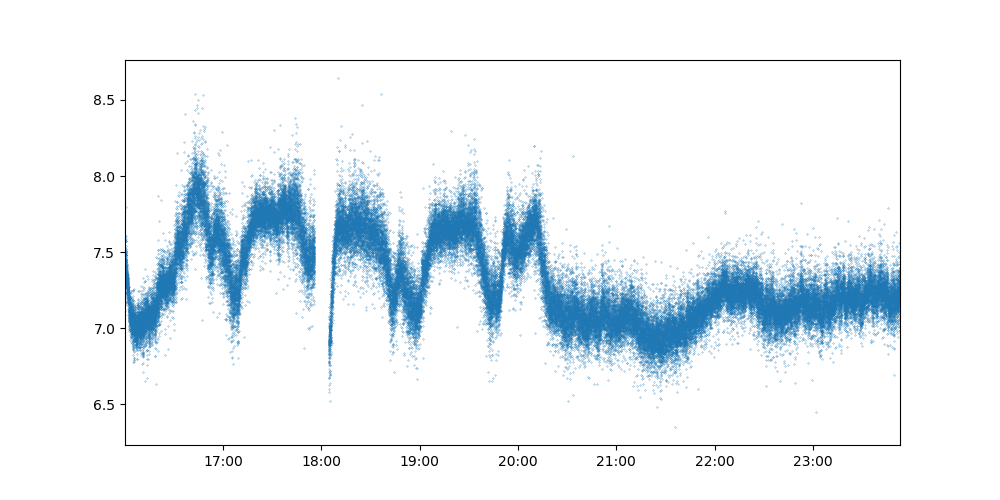

<IPython.core.display.Javascript object>


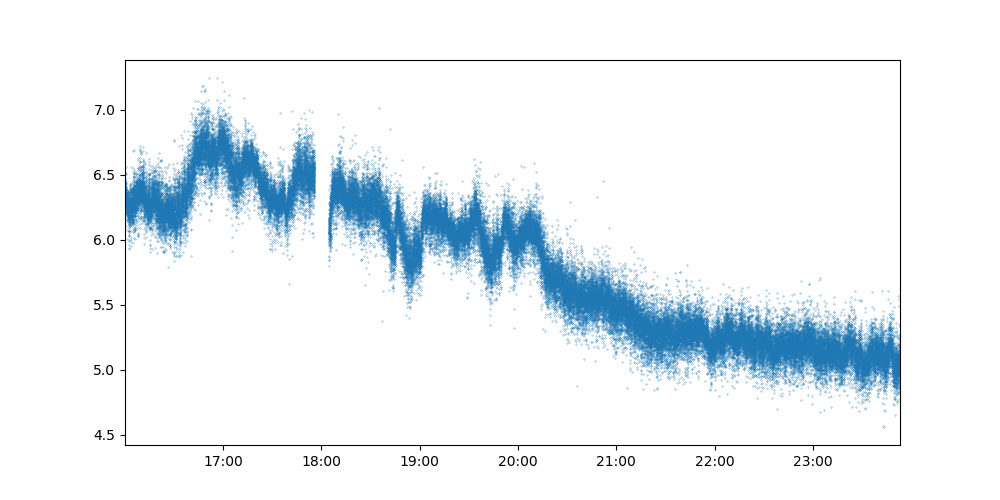

(736761.6667956829, 736761.995250868)

In [116]:
xfmt=md.DateFormatter('%H:%M')
figW=10
figH=5
fig, ax = plt.subplots()
fig.set_size_inches(figW,figH)
flattendedtimestamps=np.array(flatten(data[keylist[4]]))
dates=[dt.datetime.fromtimestamp(ts) for ts in flattendedtimestamps]

flatteneddata0=np.array(flatten(data[keylist[0]]))
flatteneddata3=np.array(flatten(data[keylist[3]]))
ax.xaxis.set_major_formatter(xfmt)
data_to_plot=flatteneddata0-flatteneddata3
#data2_to_plot=np.mean(data_to_plot.reshape(-1,100),1)
ax.scatter(dates,flatteneddata0-flatteneddata3,s=0.05)
#ax.plot(dates,data2_to_plot)
ax.set_xlim(dates[0],dates[-1])

fig, ax = plt.subplots()
fig.set_size_inches(figW,figH)
flatteneddata1=np.array(flatten(data[keylist[1]]))
flatteneddata2=np.array(flatten(data[keylist[2]]))
ax.scatter(dates,flatteneddata1-flatteneddata2,s=0.05)
ax.xaxis.set_major_formatter(xfmt)
ax.set_xlim(dates[0],dates[-1])

<IPython.core.display.Javascript object>


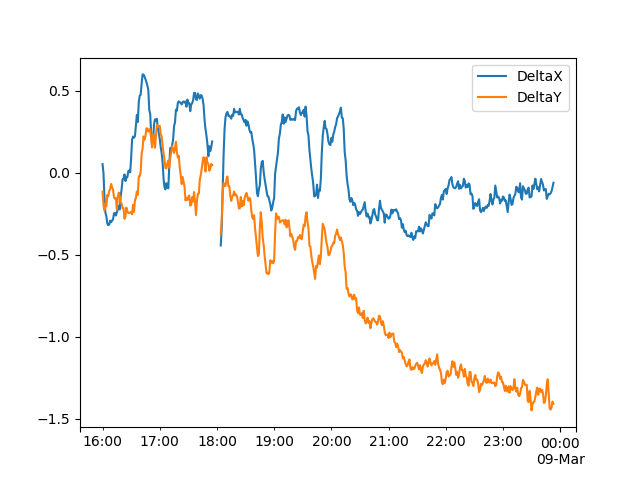

In [129]:
import pandas as pd
samplerate='60S'
offsetX=(flatteneddata0-flatteneddata3)[0]
offsetY=(flatteneddata1-flatteneddata2)[0]
df=pd.DataFrame({'DeltaX': flatteneddata0-flatteneddata3-offsetX, 'DeltaY': flatteneddata1-flatteneddata2-offsetY},index=dates)
data_to_plot2=df.resample(samplerate).mean()
ax=data_to_plot2.plot()
#ax.set_ylim(-0.5,0.5)

<IPython.core.display.Javascript object>


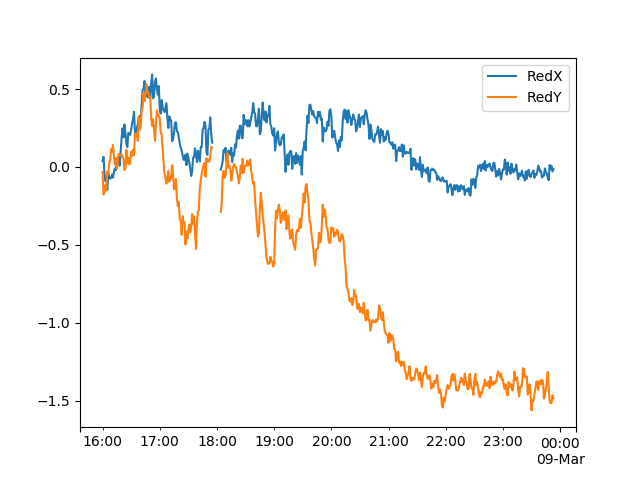

<IPython.core.display.Javascript object>


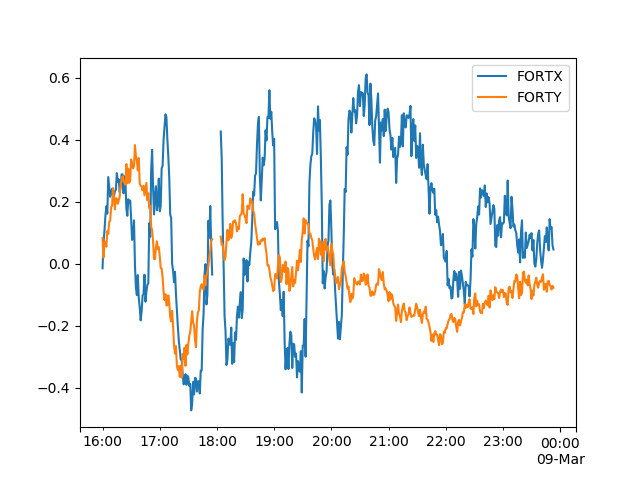

In [132]:
import pandas as pd
samplerate='60S'
df=pd.DataFrame({'RedX': flatteneddata0-flatteneddata0[0], 'RedY': flatteneddata1-flatteneddata1[0]},index=dates)
data_to_plot2=df.resample(samplerate).mean()
ax=data_to_plot2.plot()
df=pd.DataFrame({'FORTX': flatteneddata3-flatteneddata3[0], 'FORTY': flatteneddata2-flatteneddata2[0]},index=dates)
data_to_plot2=df.resample(samplerate).mean()
ax=data_to_plot2.plot()